In [4]:
import j_staget, j_staget.client, inspect, pathlib

print("j_staget file:", j_staget.__file__)
print("client file  :", j_staget.client.__file__)
print("fetch signature:", inspect.signature(j_staget.client.fetch))


j_staget file: c:\Users\hiroj\MyProject\j_staget\.venv\Lib\site-packages\j_staget\__init__.py
client file  : c:\Users\hiroj\MyProject\j_staget\.venv\Lib\site-packages\j_staget\client.py
fetch signature: (target_word: 'str | None' = None, *, year: 'int' = 1950, field: 'str' = 'article', max_records: 'int' = 20000, sleep: 'float' = 5.0, step: 'int' = 1000, timeout: 'float' = 30.0, session: 'requests.Session | None' = None, material: 'str | None' = None, author: 'str | None' = None, affil: 'str | None' = None, p_issn: 'str | None' = None, o_issn: 'str | None' = None, cdjournal: 'str | None' = None) -> 'FetchResult'


In [3]:
import inspect, j_staget.client
print(inspect.getsource(j_staget.client.fetch))


def fetch(
    target_word: str | None = None,
    *,
    year: int = 1950,
    field: str = "article",
    max_records: int = 20000,
    sleep: float = 5.0,
    step: int = DEFAULT_STEP,
    timeout: float = 30.0,
    session: requests.Session | None = None,
    # 追加: 検索条件（指定されたものだけクエリに乗せる）
    material: str | None = None,
    author: str | None = None,
    affil: str | None = None,
    p_issn: str | None = None,   # Print ISSN
    o_issn: str | None = None,   # Online ISSN
    cdjournal: str | None = None,
) -> FetchResult:
    """
    Fetch records from J-STAGE Search API (service=3).

    Parameters
    ----------
    target_word : str | None
        Search keyword (placed into the query parameter specified by `field`).
        If None/empty, you must provide at least one of: material/author/affil/issn/cdjournal.
    year : int
        pubyearfrom
    field : {"article","abst","text","keyword"}
        Which parameter receives `target_word`.
    max_records : int
        Hard cap t

In [9]:
%pip uninstall -y j-staget j_staget
%pip install --no-cache-dir git+https://github.com/HirokiMiyabe/j_staget.git@5661c30


Found existing installation: j_staget 0.1.1
Uninstalling j_staget-0.1.1:
  Successfully uninstalled j_staget-0.1.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/HirokiMiyabe/j_staget.git (to revision 5661c30) to c:\users\hiroj\appdata\local\temp\pip-req-build-asffy2r9
  Resolved https://github.com/HirokiMiyabe/j_staget.git to commit 5661c30
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for j_staget: filename=j_staget-0.1.1-py3-none-any.whl size=9396 sha256=c6f63ddff745cfbe15873f9b8e317959184c798ddbaf3c8003b8d0faf0f4c755
  Stored in directory: C:\Users\hiroj\AppData\Local\Temp\pip-ephem-wheel-cache-fixwzel_\wheels\f2\20\79\af61e655ed74818f5db3c

  Running command git clone --filter=blob:none --quiet https://github.com/HirokiMiyabe/j_staget.git 'C:\Users\hiroj\AppData\Local\Temp\pip-req-build-asffy2r9'
  Running command git checkout -q 5661c30

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import inspect, j_staget.client

print(inspect.signature(j_staget.client.fetch))
print(inspect.getsource(j_staget.client.fetch)[:300])
print(j_staget.client.__file__)


(target_word: 'str | None' = None, *, year: 'int' = 1950, field: 'str' = 'article', max_records: 'int' = 20000, sleep: 'float' = 5.0, step: 'int' = 1000, timeout: 'float' = 30.0, session: 'requests.Session | None' = None, material: 'str | None' = None, author: 'str | None' = None, affil: 'str | None' = None, p_issn: 'str | None' = None, o_issn: 'str | None' = None, cdjournal: 'str | None' = None) -> 'FetchResult'
    timeout: float = 30.0,

c:\Users\hiroj\MyProject\j_staget\.venv\Lib\site-packages\j_staget\client.py


In [7]:
res.df.columns

['author',
 'article_title',
 'material_title',
 'article_link',
 'pubyear',
 'doi',
 'volume',
 'cdvols',
 'number',
 'starting_page',
 'ending_page',
 'url_doi']

In [2]:
from j_staget import fetch

res = fetch(
    target_word="因果",
    year=1950,
    field="article",
    max_records=20,
    sleep=1.0,
)

print("total_results:", res.total_results)
res.df.head()


total_results: 1550


author,article_title,material_title,cdjournal,p_issn,o_issn,article_link,pubyear,doi,volume,cdvols,number,starting_page,ending_page,url_doi
list[str],str,str,str,str,str,str,i32,str,str,null,str,i32,i32,str
"[""太田 雅子""]","""因果的説明と因果関係""","""科学基礎論研究""",null,"""0022-7668""","""1884-1236""","""https://www.jstage.jst.go.jp/a…",1997,"""10.4288/kisoron1954.24.39""","""24""",null,"""2""",39,44,"""https://10.4288/kisoron1954.24…"
"[""狩野 裕"", ""宮村 理""]","""統計的因果推論と因果探索""","""人工知能学会第二種研究会資料""",null,""" ""","""2436-5556""","""https://www.jstage.jst.go.jp/a…",2006,"""10.11517/jsaisigtwo.2006.DMSM-…","""2006""",null,"""DMSM-A601""",2,null,"""https://10.11517/jsaisigtwo.20…"
"[""山本 順一""]","""因果応報,因果はめぐる糸車…(座標)""","""図書館界""",null,"""0040-9669""","""2424-1717""","""https://www.jstage.jst.go.jp/a…",2015,"""10.20628/toshokankai.66.5_311""","""66""",null,"""5""",311,null,"""https://10.20628/toshokankai.6…"
"[""高桑 颯希"", ""木村 元""]","""因果不等式と因果構造についての考察""","""日本物理学会講演概要集""",null,""" ""","""2189-0803""","""https://www.jstage.jst.go.jp/a…",2023,"""10.11316/jpsgaiyo.78.2.0_551""","""78.2""",null,"""0""",551,551,"""https://10.11316/jpsgaiyo.78.2…"
"[""水本 正晴""]","""事実と因果""","""科学基礎論研究""",null,"""0022-7668""","""1884-1236""","""https://www.jstage.jst.go.jp/a…",2001,"""10.4288/kisoron1954.29.19""","""29""",null,"""1""",19,25,"""https://10.4288/kisoron1954.29…"


# ISSNの指定

In [5]:
res = fetch(
    issn = "0919-9942",
    year=1950,
    field="article",
    max_records=20,
    sleep=1.0,
)

print("total_results:", res.total_results)
res.df.head()


TypeError: fetch() got an unexpected keyword argument 'issn'. Did you mean 'p_issn'?

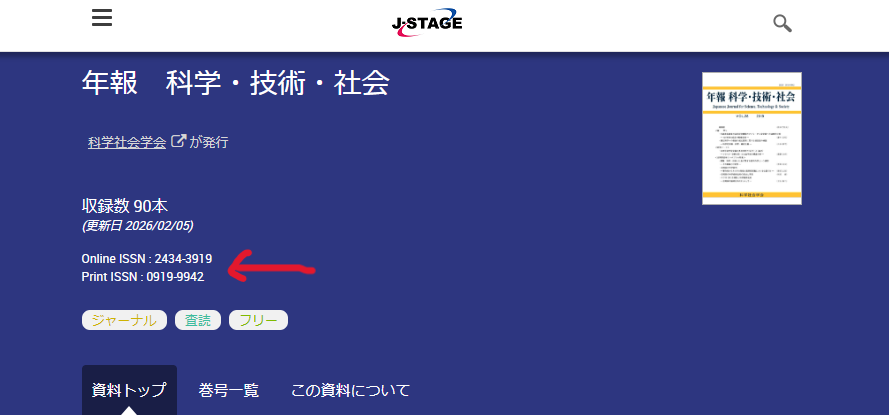

In [ ]:
# インポート
from IPython.display import Image

# 画像ファイル名(パス)
file_name = "issn_eg.png"

# IPythonで画像の読み込みと表示
Image(file_name)